# 0820

In [2]:
from openai import OpenAI
import os

MODEL = "gpt-4o-mini-2024-07-18"
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

https://python.langchain.com/v0.2/docs/how_to/#tools

## LangChain Tool
LangChain은 대형 언어 모델(LLM)을 사용하여 다양한 작업을 자동화하고 확장할 수 있도록 설계된 `프레임워크`로, 여러 도구(tool)들을 결합하여 효율적인 작업 흐름을 구축하는 데 중점을 둡니다. 이 프레임워크는 다양한 도구들과의 통합을 통해 LLM의 기능을 강화할 수 있으며, 복잡한 연산, 검색, API 호출 등을 수행할 때 사용됩니다.

LangChain에서의 Tool 사용 방식은 주로 아래와 같은 흐름으로 이루어집니다.

### 1. LLM과 Tool의 결합
LangChain에서는 LLM이 도구를 선택하고 이를 활용할 수 있도록 설계됩니다. LLM은 자체적인 답변 능력 외에도, 특정한 도구를 호출하여 더 복잡한 문제를 해결하거나 실시간 정보를 가져오도록 유도될 수 있습니다. 
예를 들어:
- 검색 도구를 사용하여 실시간 정보를 가져오거나
- 계산기 도구를 통해 수학적 계산을 수행하거나
- API 호출을 통해 외부 시스템과 상호작용하는 등의 작업이 가능합니다.
### 2. Tool의 정의
각 도구는 명시적인 기능을 가지고 있으며, LangChain에서는 이 도구들의 사용 방식을 미리 정의합니다. 도구는 함수처럼 정의될 수 있으며, LLM은 해당 도구를 사용할지 여부를 결정합니다.

예를 들어, Python 코드를 실행하는 도구가 있다면, LLM은 복잡한 수식을 해결해야 할 때 해당 도구를 호출하도록 설정될 수 있습니다. - 수학에 약하기 때문에 파이썬 코드를 실행하면 더 정확한 결과를 얻을 수 있음.

### 3. Tool 사용의 예
- 검색(Search): 실시간 정보가 필요한 질문이 들어왔을 때, LLM은 사용자의 질문을 기반으로 검색 도구를 호출하여 최신 정보를 제공합니다. 
- 계산기(Calculator): 수학적 계산이나 데이터 분석이 필요할 경우 계산기 도구를 호출하여 결과를 반환합니다.
- 데이터베이스 쿼리(Database Query): 데이터베이스에서 정보를 가져와야 할 경우, 쿼리 도구를 호출하여 데이터를 가져올 수 있습니다.
- https://platform.openai.com/docs/assistants/overview 참고
- rag, code interpreter, function calling

### 4. LangChain에서의 Tool 사용 시나리오
- 질문에 대한 실시간 정보 제공: LLM이 특정 정보에 대해 답변할 때, 내부 지식만으로는 부족한 경우 외부 검색 도구를 사용하여 최신 정보를 검색하고 그 결과를 기반으로 답변을 생성합니다.
- 복잡한 연산 처리: LLM이 간단한 계산을 넘어서 복잡한 수식이나 데이터 분석을 수행해야 할 경우, Python이나 계산기 도구를 사용해 연산을 수행하고 그 결과를 반환합니다.
- API 통합: 외부 API와의 통합을 통해 실시간 데이터 수집, 외부 서비스와의 상호작용 등을 수행합니다.

### 5. Tool 사용의 장점
LangChain의 도구 사용은 LLM이 가진 고유 능력 외에도 복잡한 작업을 처리할 수 있게 해줍니다. 이를 통해 더 높은 정확성과 유연성을 제공하며, 실시간 데이터와 연산, API 통합 등의 기능을 효과적으로 활용할 수 있습니다.

### 6. 에이전트(Agent)와 Tool의 결합
LangChain의 **에이전트(Agent)**는 도구를 어떻게 사용할지 자동으로 결정하는 역할을 합니다. 즉, 에이전트는 사용자의 요구에 맞춰 여러 도구를 결합하여 작업을 처리하는 전략을 자동으로 세우고 실행합니다.

결론적으로, LangChain에서의 Tool 사용은 LLM이 단순한 질문 응답을 넘어 실질적인 문제 해결과 작업 수행을 가능하게 하는 중요한 역할을 하며, 다양한 도구를 통합해 더 높은 수준의 작업을 수행하도록 돕습니다.

LLM에서 도구를 사용하는 가장 신뢰할 수 있는 방법 중 하나는 도구 호출 API(때로는 함수 호출이라고도 함)를 사용하는 것입니다. 이는 도구 호출을 명시적으로 지원하는 모델에서만 작동합니다.

https://python.langchain.com/v0.2/docs/integrations/tools/

In [23]:
import os
from uuid import uuid4

# unique_id를 uuid4()로 생성
unique_id = str(uuid4())

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = f"LangChain Tool Use Quickstart - {unique_id}"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"


In [3]:
unique_id

'a226f795-6553-4698-8f92-70e69f15f122'

In [7]:
from langchain_core.tools import tool

@tool
def multiply(first_int: int, second_int: int) -> int: # return은 정수만 가능
    """Multiply two integers together"""
    return first_int * second_int

In [8]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two integers together
{'first_int': {'title': 'First Int', 'type': 'integer'}, 'second_int': {'title': 'Second Int', 'type': 'integer'}}


In [10]:
#invoke는 주로 도구를 호출할 때 사용, 딕셔너리 형태로 인자를 전달
multiply.invoke({"first_int":2, "second_int":3})

6

### Tool/function calling

LLM에서 도구를 사용하는 가장 신뢰할 수 있는 방법 중 하나는 도구 호출 API(때로는 함수 호출이라고도 함)를 사용하는 것입니다. 이는 도구 호출을 명시적으로 지원하는 모델에서만 작동합니다.

- 도구 호출을 지원하는 모델을  https://python.langchain.com/v0.2/docs/integrations/chat/ 에서 확인할 수 있으며,
- [https://python.langchain.com/v0.2/docs/how_to/function_calling/#tool-calls ](https://python.langchain.com/v0.2/docs/how_to/function_calling/#tool-calls)에서 도구 호출을 사용하는 방법에 대해 자세히 알아볼 수 있습니다 .
`
먼저 모델과 도구를 정의하겠습니다. multiply 단일 도구로 시작하겠습니다.

In [11]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model=MODEL)

In [13]:
llm_with_tools = llm.bind_tools([multiply])

모델이 도구를 호출하면 출력의 AIMessage.tool_calls 필드에 도구 호출이 포함됩니다. 도구 호출은 도구 이름과 도구에 전달되는 인수를 포함합니다.

In [16]:
msg = llm_with_tools.invoke("What is 4 times 23?")
msg.tool_calls

[{'name': 'multiply',
  'args': {'first_int': 4, 'second_int': 23},
  'id': 'call_3ztXL172EBYV1e4Lquv9vgCs',
  'type': 'tool_call'}]

In [18]:
msg

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3ztXL172EBYV1e4Lquv9vgCs', 'function': {'arguments': '{"first_int":4,"second_int":23}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 55, 'total_tokens': 74}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_48196bc67a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b9733e0d-3a29-4ced-a20b-fdaea003a928-0', tool_calls=[{'name': 'multiply', 'args': {'first_int': 4, 'second_int': 23}, 'id': 'call_3ztXL172EBYV1e4Lquv9vgCs', 'type': 'tool_call'}], usage_metadata={'input_tokens': 55, 'output_tokens': 19, 'total_tokens': 74})

좋습니다! 도구 호출을 생성할 수 있습니다. 하지만 실제로 도구를 호출하고 싶다면 어떨까요? 그렇게 하려면 생성된 도구 인수를 도구에 전달해야 합니다. 간단한 예로 첫 번째 tool_call의 인수를 추출해 보겠습니다.
- llm_with_tools: 자연어 입력을 처리하여 도구 호출을 결정합니다.
- 익명 함수는 LLM의 도구 호출 결과에서 인자를 가져옵니다.
- 곱셈 함수가 해당 인자(4와 23)를 사용하여 곱셈 연산을 수행합니다.
- 이 모든 단계가 체인으로 연결되어 있어, "What's four times 23" 같은 질문에 대해 최종적으로 92라는 결과가 도출됩니다.

In [17]:
from operator import itemgetter

chain = llm_with_tools | (lambda x: x.tool_calls[0]['args']) | multiply
chain.invoke("What is 4 times 23?")

92

- llm_with_tools: 질문이 "4 곱하기 23은 무엇인가요?"와 같은 수학 문제일 때, 이 언어 모델은 자연어를 분석하고 그 결과를 도구로 전달
- | (lambda x: x.tool_calls[0]["args"]): "4 곱하기 23"이라는 질문을 처리한 결과로 도구 호출이 발생하면, 이 호출에서 인수 정보(예: {"first_int": 4, "second_int": 23})를 가져오는 역할
- | multiply: 전달된 인수가 {first_int: 4, second_int: 23}이라면, 이 도구는 4와 23을 곱해서 92라는 결과를 반환
- chain.invoke("What's four times 23"): 체인 전체를 실행하는 역할

## Agents

체인은 사용자 입력에 필요한 특정 도구 사용 순서를 알고 있을 때 유용합니다. 하지만 특정 사용 사례의 경우 도구를 사용하는 횟수는 입력에 따라 달라집니다. 이런 경우 모델 자체가 도구를 사용할 횟수와 순서를 결정하도록 합니다. 에이전트는 우리가 바로 이를 할 수 있도록 합니다.

우리는 일반적으로 가장 신뢰할 수 있고 대부분의 사용 사례에 권장되는 도구인 호출 에이전트를 사용할 것입니다 .

In [19]:
from langchain import hub
from langchain.agents import AgentExecutor, create_tool_calling_agent


### LangChain Hub: 커뮤니티 허브에서 프롬프트 탐색 및 기여
LangChain Hub는 LangChain 프레임워크를 사용하는 개발자와 사용자들을 위한 중앙화된 플랫폼입니다. 이 허브는 프롬프트, 체인, 에이전트와 같은 다양한 리소스를 커뮤니티가 공유하고 기여할 수 있도록 지원하는 커뮤니티 주도의 저장소입니다. 대형 언어 모델(LLM)을 활용하여 복잡한 애플리케이션을 개발할 때 필요한 여러 요소들을 제공하며, 이를 통해 LangChain 허브는 고품질의 리소스를 탐색하고 프로젝트에 통합할 수 있는 중앙 허브 역할을 합니다.

https://smith.langchain.com/hub?organizationId=9707e039-d288-5654-b8cc-7926348c3a05

In [20]:
# set the LANGCHAIN_API_KEY environment variable (create key in settings)
from langchain import hub

prompt = hub.pull("hwchase17/openai-tools-agent")
prompt.pretty_print()

================================ System Message ================================

You are a helpful assistant

============================= Messages Placeholder =============================

{chat_history}

================================ Human Message =================================

{input}

============================= Messages Placeholder =============================

{agent_scratchpad}


In [22]:
@tool
def add(first_int: int, second_int: int) -> int:
    """Add two integers together"""
    return first_int + second_int

@tool
def exponentiate(base: int, exponent: int) -> int:
    """Exponentiate a base to an exponent power"""
    return base ** exponent

tools = [multiply, add, exponentiate]

In [23]:
# create an agent that can call tools
agent = create_tool_calling_agent(llm, tools, prompt)

In [24]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [26]:
agent_executor.invoke(
    {
        "input": "take 3 to the fifth power, and multiply that by the sum of twelve and three, then square the whole result"
    }
)



> Entering new AgentExecutor chain...

Invoking: `exponentiate` with `{'base': 3, 'exponent': 5}`


243
Invoking: `add` with `{'first_int': 12, 'second_int': 3}`


15
Invoking: `multiply` with `{'first_int': 243, 'second_int': 15}`


3645
Invoking: `exponentiate` with `{'base': 3645, 'exponent': 2}`


13286025The final result of taking 3 to the fifth power, multiplying it by the sum of twelve and three, and then squaring the whole result is **13,286,025**.

> Finished chain.


{'input': 'take 3 to the fifth power, and multiply that by the sum of twelve and three, then square the whole result',
 'output': 'The final result of taking 3 to the fifth power, multiplying it by the sum of twelve and three, and then squaring the whole result is **13,286,025**.'}

In [ ]:
# openai에서 인식하는 expenenitate 함수의 형태
{
    "name": "exponentiate",
    "description": "Exponentiate a base to an exponent power",
    "parameters": {
        "type": "object",
        "properties": {"base": {"type": "integer"}, "exponent": {"type": "integer"}},
        "required": ["base", "exponent"],
    },
}

In [27]:
import sys
import io


class PythonREPL:
    def run(self, code: str) -> str:
        # 실행할 파이썬 코드의 출력값을 캡처
        old_stdout = sys.stdout
        new_stdout = io.StringIO()
        sys.stdout = new_stdout

        try:
            exec(code)  # 코드 실행
        except Exception as e:
            return str(e)
        finally:
            # 기존 stdout 복원
            sys.stdout = old_stdout

        # 실행 결과 반환
        return new_stdout.getvalue()


# 예시 사용
python_repl = PythonREPL()

# 실행할 코드 입력
code = """
a = 5
b = 10
print(a * b)
"""

# Python 코드 실행
result = python_repl.run(code)
print(result)

50



# 0821

initialize_agent vs. agent_executor
- initialize_agent는 에이전트를 초기화하고 실행하는 데 있어 간편하고 직관적인 방식을 제공하기 때문에, 복잡한 작업이 없고 간단한 대화형 에이전트를 만들 때는 더 적합합니다.
- agent_executor는 더 세밀한 제어가 필요할 때나, 이미 설정된 에이전트를 실행할 때 사용됩니다.

agent.invoke vs. agent.run
- LangChain 에이전트에서 사용하는 두 가지 메서드로, 각각의 동작 방식과 목적이 다릅니다.
- agent.run은 에이전트가 텍스트 입력을 받아 해당 입력에 대해 대화를 기반으로 작업을 수행할 때 사용되는 메서드입니다. 일반적으로 대화형 에이전트가 사용자의 명령이나 질문에 반응하는 방식으로 동작하며, 주로 다음과 같은 상황에서 사용됩니다:
  - 단일 사용자 입력 처리: 에이전트가 사용자로부터 한 번의 입력을 받아서 그 입력에 대한 적절한 응답을 생성하는 경우.
  - 대화형 응답: 에이전트가 주어진 입력에 대해 자동으로 도구(예: 파이썬 코드 실행 도구)를 사용하고, 그 결과를 사용하여 응답을 생성하는 구조.
  - 예시: response = agent.run("파이썬을 사용하여 25의 제곱을 계산해줘.")
- agent.invoke는 보다 세밀한 제어를 제공하는 메서드로, LangChain에서는 일반적으로 여러 개의 입력을 받을 때나 에이전트의 여러 기능을 조합해서 사용할 때 적합합니다. 이 메서드는 입력 메시지를 포함하는 포맷으로 전달하며, 이를 통해 대화나 실행 과정을 더 세밀하게 제어할 수 있습니다.
  - 메시지 기반 제어: invoke 메서드는 LangChain 메시지 포맷을 사용하여 좀 더 구조화된 입력을 받습니다. 이 메시지 포맷은 다양한 대화 구성 요소를 포함할 수 있기 때문에 복잡한 대화 흐름을 처리할 수 있습니다.
  - 다양한 입력 처리: 여러 종류의 입력을 동시에 처리하거나, 여러 도구를 연결하는 경우에 유리합니다.
  - 예시: response = agent.invoke([{"role": "user", "content": "파이썬을 사용하여 25의 제곱을 계산해줘."}])

In [ ]:
from langchain.tools import tool
from langchain.agents import initialize_agent, Tool, AgentType, create_react_agent
from langchain_openai import ChatOpenAI
from langchain.prompts import MessagesPlaceholder
from langchain.memory import ConversationBufferMemory

python_repl = PythonREPL()

tools = [
    Tool(
        name="PythonREPL",
        func=python_repl.run,
        description="Run Python code and return the output",
    )
]
# ChatOpenAI 모델을 사용하여 대화를 생성하는 에이전트 초기화
llm = ChatOpenAI(model=MODEL, temperature=0)
memory = ConversationBufferMemory(
    memory_key="chat_history"
)  # 대화 기록을 위한 메모리 사용

agent = initialize_agent(
    tools,
    llm,
    agent_type=AgentType.CHAT_CONVERSATIONAL_REACT_DESCRIPTION,
    memory=memory,
    verbose=True,
)

response = agent.run("파이썬을 사용하여 25의 제곱을 계산해줘")

print(response)

### RAG와 LangChain Tool 사용의 차이점
- RAG는 주로 사전에 인덱싱된 문서를 검색하고, 그 내용을 기반으로 답변을 생성하는 구조입니다. 검색된 정보는 기존에 구축된 데이터베이스에서 나오며, 실시간으로 업데이트되지 않은 정보일 수 있습니다.

- LangChain의 Tool 사용은 LLM이 실시간으로 외부 도구(검색, 계산기, API 등)를 사용하여 복잡한 작업을 수행하고, 이에 대한 결과를 사용해 답변을 생성합니다. 다양한 도구와의 통합을 통해 실시간 데이터를 처리하고, 상황에 맞는 도구를 선택해 사용할 수 있는 점에서 더 유연합니다.

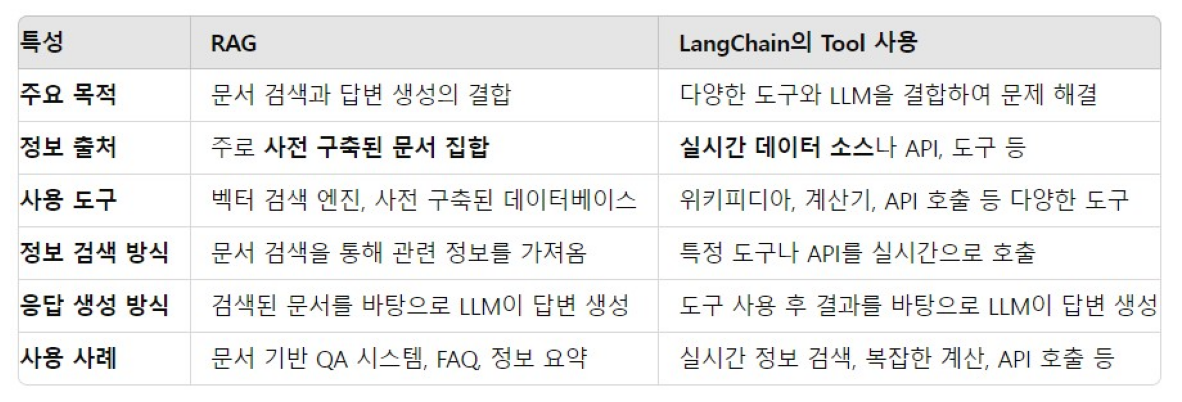

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = r"D:\pythonProject\ML\data\rag_langchain.jpg"
image = Image.open(image_path)

plt.figure(figsize=(15, 15))

plt.imshow(image)
plt.axis("off")
plt.show()

### langchain tool 사용 시나리오

In [6]:
from langchain.tools import Tool
from langchain.agents import initialize_agent, AgentType
from langchain_openai import ChatOpenAI
import wikipediaapi

def search_wikipedia(query: str) -> str:
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en",
        user_agent="my_wikipedia_agent (komehere@naver.com)",
        )
    page = wiki_wiki.page(query)
    if page.exists():
        return page.summary[:500]
    else:
        return "No page found"
    
tools = [
    Tool(
        name="wikipedia_search",
        func=search_wikipedia,
        description="use this tool to Search Wikipedia for a summary of a given query",
    )
]

llm = ChatOpenAI(model=MODEL, temperature=0)

agent = initialize_agent(
    tools,
    llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

response = agent.run("Tell me about Python programming language")

print(response)

Python is a high-level, general-purpose programming language known for its emphasis on code readability and significant indentation. It is dynamically typed, garbage-collected, and supports multiple programming paradigms, including procedural, object-oriented, and functional programming. Python is often referred to as a "batteries included" language due to its extensive standard library. Guido van Rossum started developing Python in the late 1980s.


In [8]:
from langchain.tools import Tool
from langchain.agents import initialize_agent, AgentType
from langchain_openai import ChatOpenAI
import wikipediaapi


def search_wikipedia(query: str) -> str:
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en",
        user_agent="my_wikipedia_agent (komehere@naver.com)",
    )
    page = wiki_wiki.page(query)
    if page.exists():
        print("Page Title: ", page.title)
        print("Page Summary: ", page.summary[:500])
        print("page full text Length: ", len(page.text))
        with open(f"{page.title}.txt", "w", encoding="utf-8") as f:
            f.write(page.text)
            
        return page.summary[:500]
    else:
        return "No page found"


tools = [
    Tool(
        name="wikipedia_search",
        func=search_wikipedia,
        description="use this tool to Search Wikipedia for a summary of a given query",
    )
]

llm = ChatOpenAI(model=MODEL, temperature=0)

agent = initialize_agent(
    tools,
    llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
)

response = agent.run("Tell me about Python programming language")

print(response)



> Entering new AgentExecutor chain...
I need to gather information about the Python programming language. A good approach would be to search for a summary on Wikipedia. 
Action: wikipedia_search
Action Input: "Python programming language"Page Title:  Python (programming language)
Page Summary:  Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.
Python is dynamically typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.
Guido van Rossum began working on Python in the late 1980s a
page full text Length:  42970

Observation: Python is a high-level, general-purpose programming language. Its design philosophy emphasizes code readability with the use of significant indentation.
Pyth

In [11]:
from langchain.tools import Tool
from langchain.agents import initialize_agent, AgentType
from langchain_openai import ChatOpenAI
import wikipediaapi


def search_wikipedia(query: str) -> str:
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en",
        user_agent="my_wikipedia_agent (komehere@naver.com)",
    )
    page = wiki_wiki.page(query)
    if page.exists():
        return page.summary[:500]
    else:
        return "No page found"


tools = [
    Tool(
        name="wikipedia_search",
        func=search_wikipedia,
        description="use this tool to Search Wikipedia for a summary of a given query",
    )
]

llm = ChatOpenAI(model=MODEL, temperature=0)

agent = initialize_agent(
    tools,
    llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

response = agent.run("파이썬 프로그래밍 언어에 대해 알려줘")

print(response)

파이썬은 고급의 범용 프로그래밍 언어로, 코드 가독성을 강조하며 여러 프로그래밍 패러다임을 지원합니다. 1980년대 후반에 귀도 반 로섬이 개발을 시작했습니다.


In [12]:
from langchain.tools import Tool
from langchain.agents import initialize_agent, AgentType
from langchain_openai import ChatOpenAI
import wikipediaapi


def search_wikipedia(query: str) -> str:
    wiki_wiki = wikipediaapi.Wikipedia(
        language="ko",
        user_agent="my_wikipedia_agent (komehere@naver.com)",
    )
    page = wiki_wiki.page(query)
    if page.exists():
        return page.summary[:500]
    else:
        return "No page found"


tools = [
    Tool(
        name="wikipedia_search",
        func=search_wikipedia,
        description="use this tool to Search Wikipedia for a summary of a given query",
    )
]

llm = ChatOpenAI(model=MODEL, temperature=0)

agent = initialize_agent(
    tools,
    llm,
    agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
)

response = agent.run("파이썬 프로그래밍 언어에 대해 알려줘")

print(response)

파이썬(영어: Python)은 1991년 귀도 반 로섬이 발표한 고급 프로그래밍 언어로, 객체지향적이며 플랫폼 독립적이고 동적 타이핑을 지원하는 대화형 언어입니다. 이름은 귀도가 좋아하는 코미디 프로그램인〈Monty Python's Flying Circus〉에서 따온 것이며, 간결하고 읽기 쉬운 문법이 특징입니다. 데이터 분석, 웹 개발, 인공지능 등 다양한 분야에서 활용되며, 비영리의 파이썬 소프트웨어 재단이 관리하는 개방형 개발 모델을 가지고 있습니다.


### rag사용 시나리오    

In [2]:
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter
import wikipediaapi
from sentence_transformers import SentenceTransformer
from langchain.schema import Document
from langchain_openai import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter



필요 패키지와 환경 설정
- 필요한 라이브러리들을 임포트합니다. FAISS는 벡터화된 데이터를 검색하기 위해 사용되고, langchain 라이브러리는 다양한 NLP 작업을 처리할 수 있는 도구들을 제공합니다.
- OpenAI API 키를 설정합니다. 이 API 키는 GPT 모델과 상호작용하는 데 필요합니다.

**SentenceTransformer**

SentenceTransformer의 'all-MiniLM-L6-v2' 모델은 문장을 임베딩 벡터로 변환하는 경량화된 트랜스포머 모델로, 빠르고 효율적으로 문장의 의미를 벡터 형태로 표현합니다. 이 임베딩 벡터는 문장의 의미적 유사성을 벡터 공간에서 쉽게 비교할 수 있게 해주며, 자연어 처리의 다양한 작업에 매우 유용하게 활용됩니다.

**'all-MiniLM-L6-v2' 모델**

입력된 문장을 다음과 같은 절차로 처리합니다:
- 토큰화(Tokenization): 입력 문장을 **토큰(단어 또는 하위 단위)**으로 나눕니다. 이 과정에서 문장은 단어 또는 의미 단위로 쪼개집니다. - 많이 사용되는 기준으로 토큰화하는 방식: BPE(Byte Pair Encoding)gpt에서 많이 사용, 
- 임베딩 생성: 문장을 토큰으로 나눈 후, 각 토큰을 벡터로 변환한 뒤, 이를 조합하여 전체 문장의 임베딩 벡터를 만듭니다. 저차원으로 벡터화하여 문장의 의미를 표현
- 출력: 최종적으로, 입력된 문장은 하나의 고정된 길이의 벡터로 변환됩니다.

OpenAIEmbeddings()

- 역할: OpenAIEmbeddings()는 주로 FAISS와 같은 벡터 검색 라이브러리에서 문서의 임베딩을 처리하고 인덱싱할 때 사용됩니다.
- 목적: 문서를 벡터화하고 인덱스에 저장하는 과정에서 임베딩을 자동으로 생성하여 FAISS에 전달하는 역할을 합니다.
- 사용 이유: OpenAIEmbeddings()는 OpenAI의 사전 학습된 GPT 계열 모델을 기반으로 임베딩을 생성하며, 이를 통해 벡터 검색이 가능합니다. 즉, 문서 인덱싱을 OpenAI 임베딩을 사용하여 처리할 수 있습니다.

In [3]:
def get_wikipedia_page(page_title: str) -> str:
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en",
        user_agent="my_wikipedia_agent (komehere@naver.com)",
    )
    page = wiki_wiki.page(page_title)
    if page.exists():
        return page.text
    else:
        return "No page found"

 위키피디아 문서 가져오기
 - wikipediaapi 라이브러리를 사용해 특정 페이지의 텍스트를 가져옵니다. 페이지가 존재하지 않으면 "Page not found"를 반환합니다.
- 이 함수는 RAG에서 사용할 데이터를 수집하는 역할을 합니다.

In [10]:
def create_faiss_index(pages):
    embedder = SentenceTransformer("all-MiniLM-L6-v2")
    documents = []
    metadatas = []

    for title, content in pages.items():
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=500,
            chunk_overlap=0,
            separators=["\n", ".", "\n\n", " " ],
        )
        chunks = text_splitter.split_text(content)
        for chunk in chunks:
            documents.append(Document(page_content=chunk, metadata={"title": title}))
            metadatas.append({'title':title})
    # 임베딩은 문서나 문장의 의미를 수치적으로 표현한 벡터입니다. 이를 통해 유사한 문서들을 벡터 공간에서 비교할 수 있습니다.
    # embeddings = embedder.encode([doc.page_content for doc in documents])  # 각 청크에 대해 임베딩 벡터를 생성
    # FAISS는 빠른 유사도 검색을 위한 라이브러리입니다. FAISS를 사용하면 대규모 임베딩 벡터를 빠르게 검색할 수 있습니다.
    faiss_index = FAISS.from_documents(documents, OpenAIEmbeddings())
    return faiss_index

In [12]:
def create_faiss_index(pages):
    documents = []

    for title, content in pages.items():
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=500,
            chunk_overlap=0,
            separators=["\n", ".", "\n\n", " "],
        )
        chunks = text_splitter.split_text(content)
        for chunk in chunks:
            documents.append(Document(page_content=chunk, metadata={"title": title}))
    # 임베딩은 문서나 문장의 의미를 수치적으로 표현한 벡터입니다. 이를 통해 유사한 문서들을 벡터 공간에서 비교할 수 있습니다.
    # FAISS는 빠른 유사도 검색을 위한 라이브러리입니다. FAISS를 사용하면 대규모 임베딩 벡터를 빠르게 검색할 수 있습니다.
    faiss_index = FAISS.from_documents(documents, OpenAIEmbeddings())
    return faiss_index

 FAISS 인덱스 생성
 - 텍스트 분할기: 문서가 너무 길면 한 번에 처리하기 어렵기 때문에, RecursiveCharacterTextSplitter를 사용해 문서를 작은 덩어리(최대 500자)로 나눕니다. 이 과정에서 문단, 줄바꿈, 구문점 등을 기준으로 나눕니다.
- 임베딩 생성: 문서에서 나눈 텍스트 덩어리들에 대해 OpenAIEmbeddings()를 사용해 벡터로 변환합니다.
- FAISS 인덱스 생성: 변환된 임베딩을 FAISS에 저장하여 나중에 유사한 벡터를 빠르게 검색할 수 있도록 설정합니다.

FAISS는 벡터화된 문서들을 저장하고, 새로운 입력이 들어왔을 때 그와 유사한 문서들을 빠르게 찾아내는 도구입니다.

In [13]:
pages = {
    "Python (programming language)" : get_wikipedia_page("Python (programming language)"),
    "Java (programming language)" : get_wikipedia_page("Java (programming language)"),
    "Artificial intelligence" : get_wikipedia_page("Artificial intelligence"),
}

문서 임베딩을 위한 사전 정의
- 세 개의 위키피디아 페이지를 가져옵니다: Python 프로그래밍 언어, 인공지능, 머신러닝. 이 문서들은 나중에 질문에 답할 때 참조할 데이터가 됩니다.

FAISS 인덱스 생성
- 위에서 정의한 pages에 대해 FAISS 인덱스를 생성합니다. 이 인덱스는 나중에 사용자의 질문과 관련된 문서를 빠르게 찾는 데 사용됩니다.

In [14]:
faiss_index = create_faiss_index(pages)

LLM과 벡터 검색 결합
- ChatOpenAI: GPT 모델을 사용해 질문에 대한 답변을 생성합니다. 여기서는 OpenAI의 GPT-4 모델의 파생 모델인 gpt-4o-mini-2024-07-18을 사용합니다.
- RetrievalQA: 이 체인은 FAISS 인덱스를 통해 검색된 문서와 GPT 모델을 결합하여 질문에 답변하는 역할을 합니다. chain_type="stuff"는 검색된 문서를 단일 입력으로 처리하여 답변을 생성하는 방식입니다.

In [18]:
llm = ChatOpenAI(model='gpt-4o-mini-2024-07-18', temperature=0)
qa_chain = RetrievalQA.from_chain_type(llm, chain_type="stuff", retriever=faiss_index.as_retriever())

In [19]:
query = "What is Python programming language?"
response = qa_chain.run(query)
print(response)

Python is a high-level, general-purpose programming language known for its emphasis on code readability through significant indentation. It is dynamically typed and garbage-collected, supporting multiple programming paradigms, including structured, object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library. It was invented in the late 1980s by Guido van Rossum and has consistently ranked among the most popular programming languages.


In [24]:
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings
import wikipediaapi
from langchain.schema import Document
from langchain_openai import ChatOpenAI
from langchain.text_splitter import RecursiveCharacterTextSplitter

def get_wikipedia_page(page_title: str) -> str:
    wiki_wiki = wikipediaapi.Wikipedia(
        language="en",
        user_agent="my_wikipedia_agent (komehere@naver.com)",
    )
    page = wiki_wiki.page(page_title)
    if page.exists():
        return page.text
    else:
        return "No page found"

def create_faiss_index(pages):
    documnets = []
    for title, content in pages.items():
        text_splitter = RecursiveCharacterTextSplitter(
            chunk_size=500,
            chunk_overlap=0,
            separators=["\n", ".", "\n\n", " "],
        )
        chunks = text_splitter.split_text(content)
        for chunk in chunks:
            documnets.append(Document(page_content=chunk ))
        faiss_index = FAISS.from_documents(documnets, OpenAIEmbeddings())   
        return faiss_index

pages = {
    "Python (programming language)": get_wikipedia_page(
        "Python (programming language)"
    ),
    "Java (programming language)": get_wikipedia_page("Java (programming language)"),
    "Artificial intelligence": get_wikipedia_page("Artificial intelligence"),
}

faiss_index = create_faiss_index(pages)

llm = ChatOpenAI(model='gpt-4o-mini-2024-07-18', temperature=0)
qa_chain = RetrievalQA.from_chain_type(llm, chain_type='stuff', retriever=faiss_index.as_retriever())

query = "What is Python programming language?"
response = qa_chain.run(query)
print(response)

Python is a high-level, general-purpose programming language known for its emphasis on code readability through significant indentation. It is dynamically typed and garbage-collected, supporting multiple programming paradigms, including structured, object-oriented, and functional programming. Python is often described as a "batteries included" language due to its comprehensive standard library. It was invented in the late 1980s by Guido van Rossum and has consistently ranked among the most popular programming languages.
